In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df=pd.read_csv('Cardiovascular_Disease_Dataset.csv')

In [4]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [6]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB
None


In [7]:
# Summary statistics
print(df.describe())

          patientid         age       gender    chestpain    restingBP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  \
count      1000.000000        1000.000000      1000.000000   1000.000000   
mean        311.447000           0.296000         0.748000    145.477000   
std         132.443801           0.456719         0.770123     34.190268   
min           0.000000       

In [8]:
# Check for missing values
print(df.isnull().sum())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


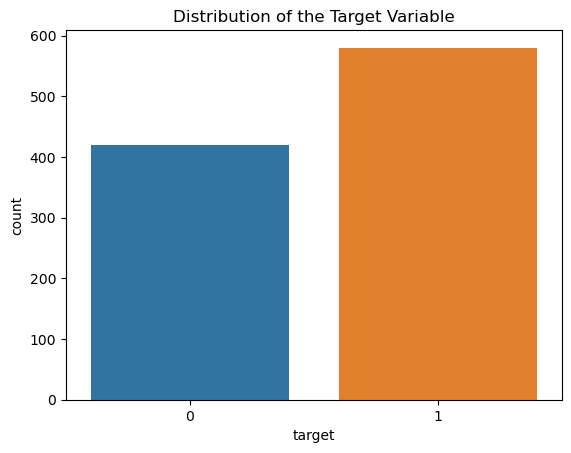

In [9]:
# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of the Target Variable')
plt.show()

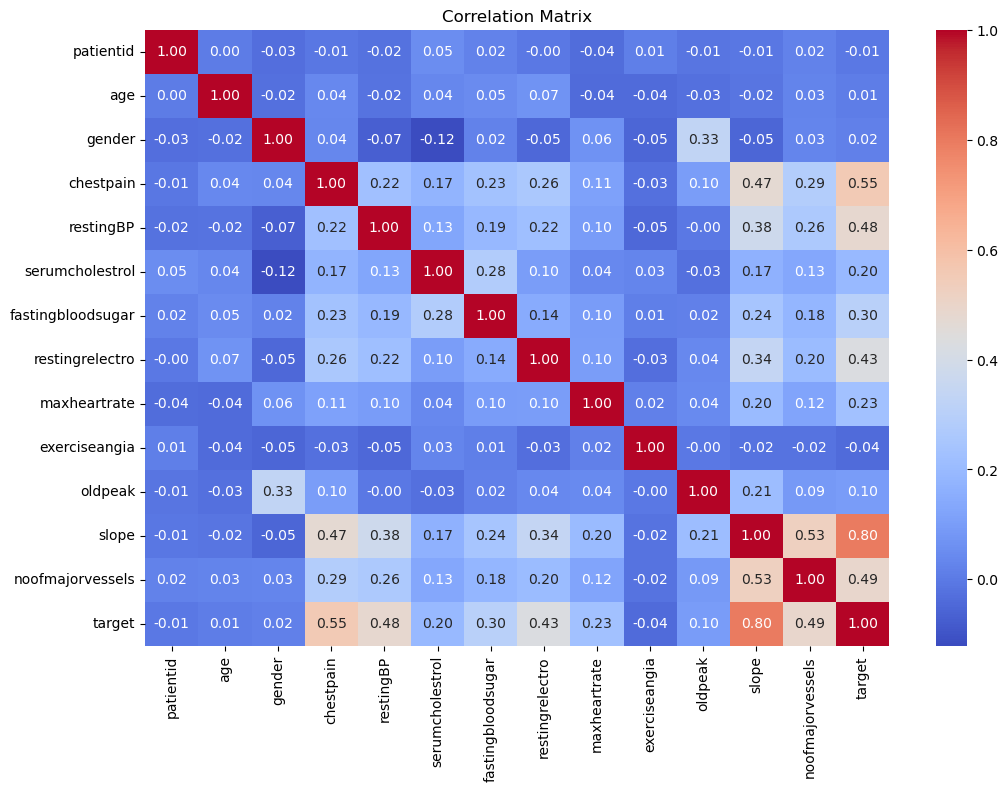

In [10]:
# Explore the correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

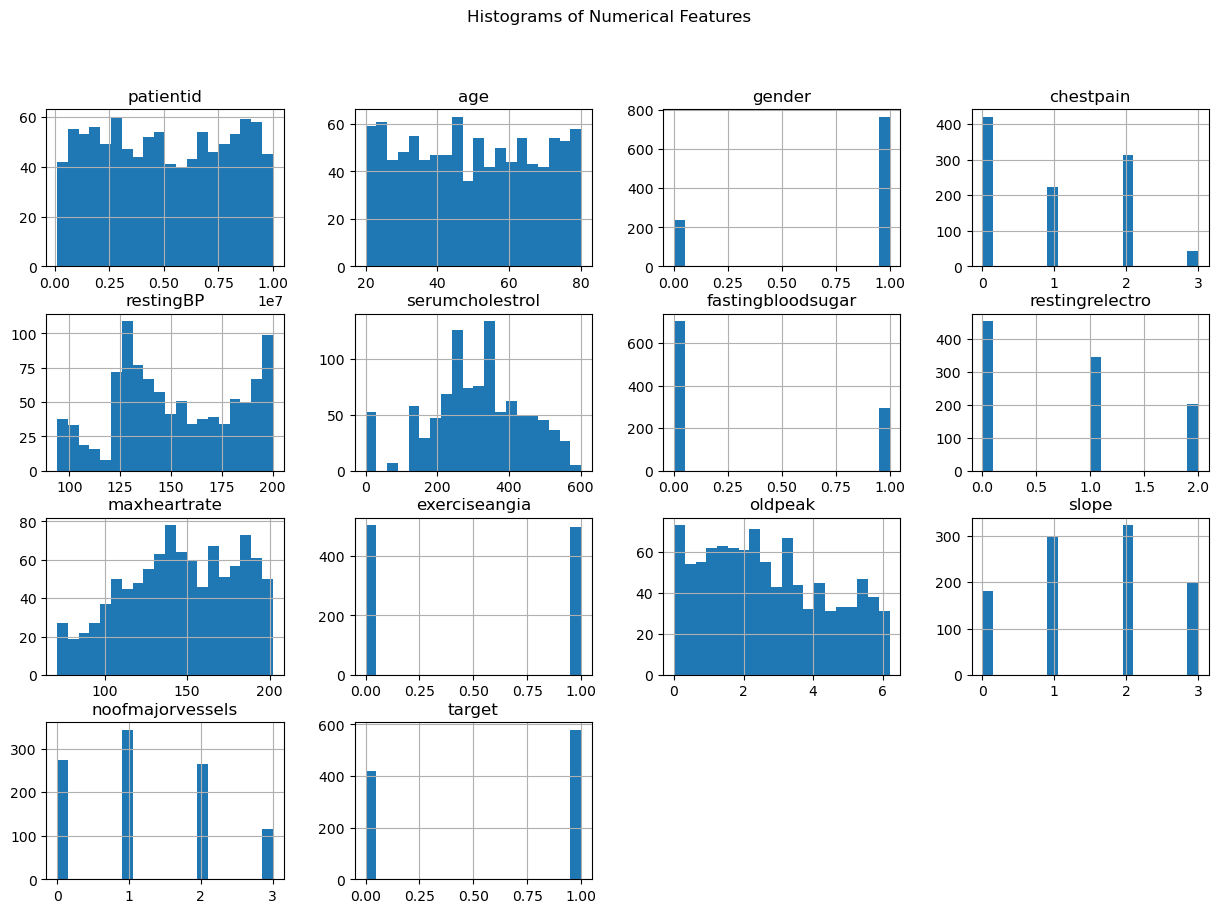

In [11]:
# Explore the distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Initialize the RandomForestClassifier (you can try other classifiers too)
model = RandomForestClassifier(random_state=42)

In [17]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Make predictions
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [20]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.98
Confusion Matrix:
[[ 81   2]
 [  1 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.98      0.99      0.99       117

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

